In [24]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
import time
import datetime
import csv
import cv2
import keyboard
import winsound
import copy

In [27]:
# import data
data_array = np.genfromtxt('Bennet_1.csv', delimiter=',', skip_header=2, usecols=[0,1,2,3,5,6,7])
# convert unix to zeroed session time
start_time = data_array[0,0]
end_time = data_array[-1,0]
data_array[:,0] = (data_array[:,0]-start_time)/1000




### ADD SESSION DATE AS SHOWN IN FIRST FRAME OF VIDEO ###
session_date = datetime.date(2023,1,24) # [year,month,day]
session_start_time = [13,1,7,507] # [hour,minute,second,millisecond]

# SPECIFY AFFECTED LEG
leg = "left"

if leg == "left":
    data_array[:,6] = -1*data_array[:,6]


    
# convert to time format
session_start_time = datetime.time(session_start_time[0],session_start_time[1],session_start_time[2],session_start_time[3]*1000)
# combine with session date
session_start_time = datetime.datetime.combine(session_date,session_start_time)
# convert to unix time
session_start_unixtime = time.mktime(session_start_time.timetuple())*1000 + session_start_time.microsecond/1000

#print(session_start_unixtime)



# Open the video file
video = cv2.VideoCapture('Bennet_1.mov')
#fps = video.get(cv2.CAP_PROP_FPS)
fps = 120
print(fps)

# Create an empty list to store the frames
frames = []

# Iterate over the frames of the video
while video.isOpened():
    # Read the next frame
    ret, frame = video.read()

    # If the frame was not read properly, break the loop
    if not ret:
        break

    # convert to grayscale   
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)    
    
    # Add the frame to the list
    #frames.append(frame)
    frames.append(gray_frame)
    
    if len(frames)>18000:
        break

# Release the video capture object
video.release()

# Now you can access the frames using their index in the list,
# for example:
# first_frame = frames[0]
# second_frame = frames[1]
# etc.

120


In [28]:
i = 0
TO_array = np.array([])
HS_array = np.array([])

# for overlaying text on video frames
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,500)
fontScale              = 2
fontColor              = (255,255,51)
thickness              = 2
lineType               = 2


#frames_backup = copy.deepcopy(frames)

while True:
    current_frame = frames[i]
    cv2.imshow("frame", current_frame)
    cv2.waitKey(500)
    
    
    # Use arrowkeys to navigate through frames
    if keyboard.is_pressed('right'):
        i += 10
        if i>=len(frames):
            i = len(frames)-1
    if keyboard.is_pressed('left'):
        i -= 10
        if i<0:
            i = 0
    if keyboard.is_pressed('up'):  
        i += 1
        if i>=len(frames):
            i = len(frames)-1       
    if keyboard.is_pressed('down'):  
        i -= 1
        if i<0:
            i = 0
            
    # Use 't' to label a TO event
    if keyboard.is_pressed('t'):
        current_frame_unixtime = i*1000/fps + session_start_unixtime
        TO_array = np.append(TO_array, current_frame_unixtime)
        winsound.Beep(800,1000)
        frames[i] = cv2.putText(frames[i],'Toe off', 
            bottomLeftCornerOfText, 
            font, 
            fontScale,
            fontColor,
            thickness,
            lineType)
    
    # Use 'h' to label a HS event
    if keyboard.is_pressed('h'):
        current_frame_unixtime = i*1000/fps + session_start_unixtime
        HS_array = np.append(HS_array, current_frame_unixtime)
        winsound.Beep(1000,1000)
        frames[i] = cv2.putText(frames[i],'Heel strike', 
            bottomLeftCornerOfText, 
            font, 
            fontScale,
            fontColor,
            thickness,
            lineType)
        
    if keyboard.is_pressed('backspace'):
        if HS_array[-1]>TO_array[-1]:
            HS_array = np.delete(HS_array, -1)
        else:
            TO_array = np.delete(TO_array, -1)
        winsound.Beep(600,1000)
        #frames[i] = frames_backup[i]
        frames[i] = cv2.putText(frames[i],'Not', 
            bottomLeftCornerOfText, 
            font, 
            fontScale,
            fontColor,
            thickness,
            lineType)
    
            
    # Use 'q' to exit window
    if keyboard.is_pressed('q'):
        break

        
cv2.destroyAllWindows()
print(TO_array)

[1.67458329e+12 1.67458329e+12 1.67458329e+12 1.67458330e+12
 1.67458330e+12 1.67458330e+12 1.67458330e+12 1.67458330e+12
 1.67458330e+12 1.67458330e+12 1.67458331e+12 1.67458331e+12
 1.67458331e+12 1.67458331e+12 1.67458331e+12 1.67458331e+12
 1.67458331e+12 1.67458331e+12 1.67458332e+12 1.67458332e+12
 1.67458332e+12 1.67458332e+12 1.67458332e+12 1.67458332e+12
 1.67458332e+12 1.67458332e+12 1.67458333e+12 1.67458333e+12
 1.67458333e+12 1.67458333e+12 1.67458333e+12 1.67458333e+12
 1.67458333e+12 1.67458333e+12 1.67458334e+12 1.67458334e+12
 1.67458334e+12 1.67458334e+12 1.67458334e+12 1.67458334e+12
 1.67458334e+12 1.67458334e+12 1.67458335e+12 1.67458335e+12
 1.67458335e+12 1.67458335e+12 1.67458335e+12 1.67458335e+12
 1.67458335e+12 1.67458335e+12 1.67458336e+12 1.67458336e+12
 1.67458336e+12 1.67458336e+12 1.67458336e+12 1.67458336e+12
 1.67458336e+12]


In [18]:
#print(TO_array)
print((TO_array-start_time)/1000)

# convert to standard time to make sure the calculated timestamp aligns with what's shown on the computer
dt_object = datetime.datetime.fromtimestamp(TO_array[0]/1000)

# Print the formatted date and time
print(dt_object.strftime("%Y-%m-%d %H:%M:%S.%f"))

[4.18217993]
2023-01-24 12:49:13.463000


(10620, 7)


<function matplotlib.pyplot.show(close=None, block=None)>

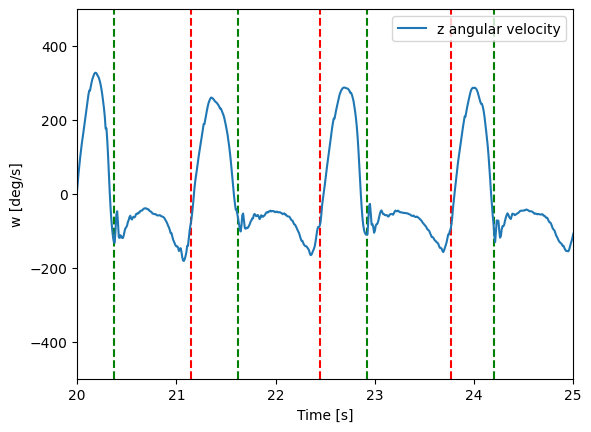

In [30]:

# standardize to match session time
TO_times = (TO_array - start_time)/1000
HS_times = (HS_array - start_time)/1000



# ADD CORRECTING OFFSET
clock_offset = 0.03 # amount in milliseconds by which the shimmer is leading the video 
TO_times += clock_offset
HS_times += clock_offset


fig1 = plt.figure()

# Write labels to csv
labelled_df = pd.read_csv('Bennet_1.csv', skiprows=0)
labelled_df.drop(labelled_df.tail(1).index,inplace=True) # drop last n rows
labelled_col = np.zeros(labelled_df.shape[0])


for TO, HS in zip(TO_times, HS_times):
    plt.axvline(TO, color='r', linestyle='--')
    plt.axvline(HS, color='g', linestyle='--')
    
    #labelled_col[data_array[:,0]>TO][0] = data_array[data_array[:,0]>TO][0,0]
    #labelled_col[np.logical_and((TO+0.05)>data_array[:,0],data_array[:,0]>(TO-0.05))] = 1.0
    labelled_col[np.logical_and((HS+0.05)>data_array[:,0],data_array[:,0]>(TO-0.05))] = 1.0


labelled_df['Swing?'] = labelled_col.tolist()

# Adjust Unix time to session time in output csv

labelled_df.iloc[1:,0] = data_array[:-1,0].tolist()
labelled_df.to_csv('labelled_0.csv', index=False)


print(data_array.shape)

plt.plot(data_array[:,0], data_array[:,6], label = 'z angular velocity')
#plt.plot(data_array[:,0], data_array[:6], label = 'x linear accel')


plot_position = 0
#plt.axis([TO_times[plot_position],TO_times[plot_position]+10, -10,1000])
plt.axis([20,25, -500,500])
    
plt.xlabel("Time [s]")
plt.ylabel("w [deg/s]")
    
plt.legend()

plt.show
